## PIL - Python Image Library

### Image class methods and variables

In [6]:
from PIL import Image

d = [i for i in dir(Image) 
     if not i.startswith('_')]
print('These are Variables of Image module:')
print('*'*37)
for x in d:
    if not callable(getattr(Image, x)):
        print(x)
else:
    print()

print('These are Classes and Methods of Image module:')
print('*'*47)
for x in d:
    if callable(getattr(Image, x)):
        print(x)

These are Variables of Image module:
*************************************
ADAPTIVE
AFFINE
ANTIALIAS
BICUBIC
BILINEAR
BOX
CONTAINER
CUBIC
DECODERS
DEFAULT_STRATEGY
ENCODERS
EXTENSION
EXTENT
FASTOCTREE
FILTERED
FIXED
FLIP_LEFT_RIGHT
FLIP_TOP_BOTTOM
FLOYDSTEINBERG
HAMMING
HAS_PATHLIB
HUFFMAN_ONLY
ID
ImageMode
LANCZOS
LIBIMAGEQUANT
LINEAR
MAXCOVERAGE
MAX_IMAGE_PIXELS
MEDIANCUT
MESH
MIME
MODES
NEAREST
NONE
NORMAL
OPEN
ORDERED
PERSPECTIVE
PILLOW_VERSION
QUAD
RASTERIZE
RLE
ROTATE_180
ROTATE_270
ROTATE_90
SAVE
SAVE_ALL
SEQUENCE
TRANSPOSE
TRANSVERSE
TiffTags
USE_CFFI_ACCESS
WEB
atexit
builtins
cffi
core
io
logger
logging
math
numbers
os
py3
struct
sys
warnings

These are Classes and Methods of Image module:
***********************************************
Callable
DecompressionBombError
DecompressionBombWarning
Exif
Image
ImagePointHandler
ImageTransformHandler
MutableMapping
Path
alpha_composite
blend
coerce_e
composite
deferred_error
effect_mandelbrot
effect_noise
eval
fromarray
frombuffer
fr

### list image class attribute.

In [4]:
from PIL import Image

dir(Image)

['ADAPTIVE',
 'AFFINE',
 'ANTIALIAS',
 'BICUBIC',
 'BILINEAR',
 'BOX',
 'CONTAINER',
 'CUBIC',
 'Callable',
 'DECODERS',
 'DEFAULT_STRATEGY',
 'DecompressionBombError',
 'DecompressionBombWarning',
 'ENCODERS',
 'EXTENSION',
 'EXTENT',
 'Exif',
 'FASTOCTREE',
 'FILTERED',
 'FIXED',
 'FLIP_LEFT_RIGHT',
 'FLIP_TOP_BOTTOM',
 'FLOYDSTEINBERG',
 'HAMMING',
 'HAS_PATHLIB',
 'HUFFMAN_ONLY',
 'ID',
 'Image',
 'ImageMode',
 'ImagePointHandler',
 'ImageTransformHandler',
 'LANCZOS',
 'LIBIMAGEQUANT',
 'LINEAR',
 'MAXCOVERAGE',
 'MAX_IMAGE_PIXELS',
 'MEDIANCUT',
 'MESH',
 'MIME',
 'MODES',
 'MutableMapping',
 'NEAREST',
 'NONE',
 'NORMAL',
 'OPEN',
 'ORDERED',
 'PERSPECTIVE',
 'PILLOW_VERSION',
 'Path',
 'QUAD',
 'RASTERIZE',
 'RLE',
 'ROTATE_180',
 'ROTATE_270',
 'ROTATE_90',
 'SAVE',
 'SAVE_ALL',
 'SEQUENCE',
 'TRANSPOSE',
 'TRANSVERSE',
 'TiffTags',
 'USE_CFFI_ACCESS',
 'WEB',
 '_E',
 '_ENDIAN',
 '_MAPMODES',
 '_MODEINFO',
 '_MODE_CONV',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',

### variables

## methods

### open()

### How to open image file?

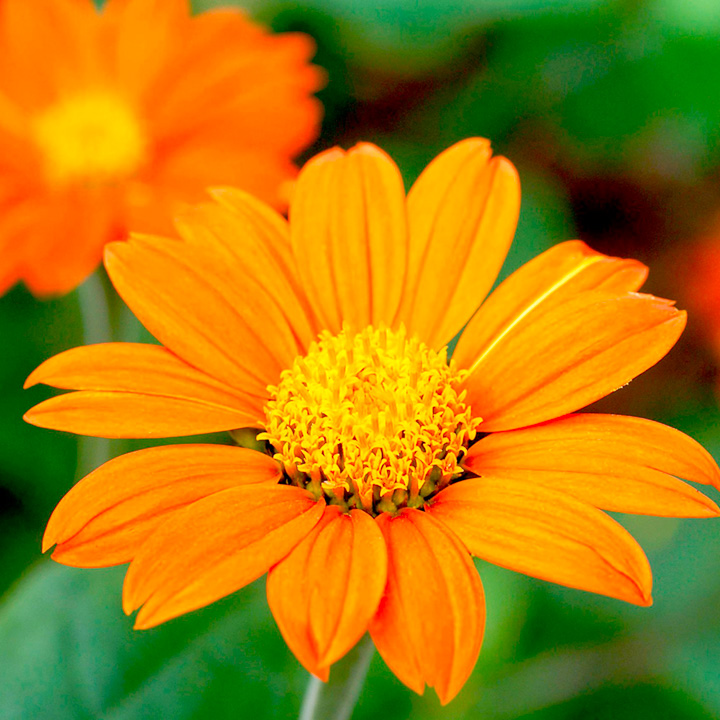

In [1]:
from PIL import Image

Image.open('/home/mana/Pictures/flower.jpg')



### show()

In [5]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower.jpg')
im.show()

### save()

### Reading and writing images

#### Convert files to PNG from JPG

In [5]:
from PIL import Image
from pathlib import Path

ext = Path('/home/mana/Pictures/flower.jpg').suffix
if '.jpg' == ext:
    try:
        Image.open('/home/mana/Pictures/flower.jpg').save('/home/mana/Pictures/flower.png')
    except IOError:
        print('File not found.')
    

### Identify image attribute

In [3]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower.jpg')
print(im.format, im.size, im.mode)

JPEG (720, 720) RGB


### thumbnail()

#### Create JPEG thumbnails

In [16]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower.jpg')
im.thumbnail((128,128))
im.save('/home/mana/Pictures/flower-thump.jpg')

In [15]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower.jpg')
im.thumbnail((256,256))
im.save('/home/mana/Pictures/img2.jpg')

### Cutting, pasting, and merging images
The Image class contains methods allowing you to manipulate regions within an image.

### crop()
To extract a sub-rectangle from an image, use the crop() method.

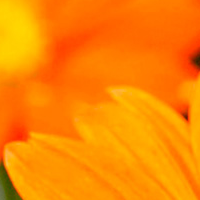

In [13]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower.jpg')
box = (100, 100, 300, 300)
im.crop(box)

### paste()

In [19]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower.jpg')
box = (100, 100, 400,400)
region = im.crop(box)
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)

### Rolling an image

In [26]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower.jpg')

def roll(im, delta):
    xsize, ysize = im.size
    delta = xsize
    if delta == 0: return im
    part1 = im.crop((0, 0, delta, ysize))
    part2 = im.crop((delta, 0, xsize, ysize))
    im.paste(part1, (xsize-delta, 0, xsize, ysize))
    im.paste(part2, (0, 0, xsize-delta, ysize))

    return im

### Splitting and merging bands


### split()



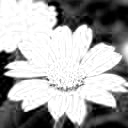

In [29]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower-thump.jpg')
r, g, b = im.split()
r

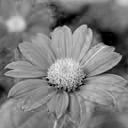

In [30]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower-thump.jpg')
r, g, b = im.split()
g

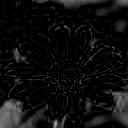

In [31]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower-thump.jpg')
r, g, b = im.split()
b

### merge()
The merge function takes a mode and a tuple of images, and combines them into a new image. 

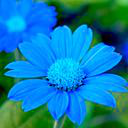

In [33]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower-thump.jpg')
r, g, b = im.split()
Image.merge('RGB', (b, g, r))

### Geometrical transforms

### resize() and rotate()

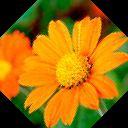

In [45]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower-thump.jpg')
#im.resize(128, 128)
im.rotate(45) # degrees counter-clockwise

### transpose()

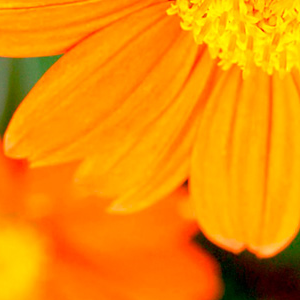

In [53]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower.jpg')
box = (100, 100, 400,400)
region = im.crop(box)
region.transpose(Image.FLIP_TOP_BOTTOM)

### Color transforms

### Converting between modes

### convert()
To convert images between different pixel representations using the convert() method.

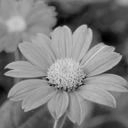

In [57]:
from PIL import Image

im = Image.open('/home/mana/Pictures/flower-thump.jpg').convert("L")
im


### Image enhancement
The Python Imaging Library provides a number of methods and modules that can be used to enhance images.


### Filters


### class ImageFilter
The ImageFilter module contains a number of pre-defined enhancement filters that can be used with the filter() method.

In [59]:
from PIL import ImageFilter

d = [i for i in dir(ImageFilter) 
     if not i.startswith('_')]
print('These are Variables of ImageFilter module:')
print('*'*37)
for x in d:
    if not callable(getattr(ImageFilter, x)):
        print(x)
else:
    print()

print('These are Classes and Methods of ImageFilter module:')
print('*'*47)
for x in d:
    if callable(getattr(ImageFilter, x)):
        print(x)

These are Variables of ImageFilter module:
*************************************
division
functools
numpy

These are Classes and Methods of ImageFilter module:
***********************************************
BLUR
BoxBlur
BuiltinFilter
CONTOUR
Color3DLUT
DETAIL
EDGE_ENHANCE
EDGE_ENHANCE_MORE
EMBOSS
FIND_EDGES
Filter
GaussianBlur
Kernel
MaxFilter
MedianFilter
MinFilter
ModeFilter
MultibandFilter
RankFilter
SHARPEN
SMOOTH
SMOOTH_MORE
UnsharpMask


#### Applying filters

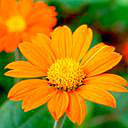

In [58]:
from PIL import Image, ImageFilter

im = Image.open('/home/mana/Pictures/flower-thump.jpg')
im.filter(ImageFilter.DETAIL)

### Point Operations

### How to increase light?

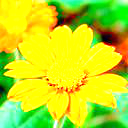

In [25]:
from PIL import Image, ImageFilter

im = Image.open('/home/mana/Pictures/flower-thump.jpg')
# multiply each pixel by 1.2
out = im.point(lambda i: i * 2)
out

### Processing individual bands

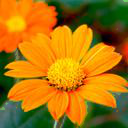

In [11]:
from PIL import Image, ImageFilter

im = Image.open('/home/mana/Pictures/flower-thump.jpg')
# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)
im

### Enhancement

### Enhancing images

In [26]:
from PIL import Image, ImageEnhance

im = Image.open('/home/mana/Pictures/flower-thump.jpg')
enh = ImageEnhance.Contrast(im)
enh.enhance(1.3).show("30% more contrast")

In [13]:
from PIL import ImageChops

dir(ImageChops)

['Image',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add',
 'add_modulo',
 'blend',
 'composite',
 'constant',
 'darker',
 'difference',
 'duplicate',
 'invert',
 'lighter',
 'logical_and',
 'logical_or',
 'logical_xor',
 'multiply',
 'offset',
 'screen',
 'subtract',
 'subtract_modulo']

### How to compare two images?

In [126]:
from PIL import Image,ImageChops
 

image_one = Image.open('/home/mana/Pictures/flower-thump.jpg')
image_two = Image.open('/home/mana/Pictures/flower-thump1.jpg')
diff = ImageChops.difference(image_one, image_two)
 
if diff.getbbox():
        diff.save('/home/mana/Pictures/flower-change.jpg')

### How to identify changed location between two images?

In [134]:
from PIL import Image,ImageChops
 

image_one = Image.open('/home/mana/Pictures/sat1.jpg')
image_two = Image.open('/home/mana/Pictures/sat2.jpg')
diff = ImageChops.difference(image_one, image_two)
 
if diff.getbbox():
        diff.save('/home/mana/Pictures/everest-change.jpg')

In [125]:
from PIL import Image,ImageChops
 

image_one = Image.open('/home/mana/Pictures/falls1.jpg')
image_two = Image.open('/home/mana/Pictures/falls2.jpg')
diff = ImageChops.difference(image_one, image_two)
 
if diff.getbbox():
        diff.save('/home/mana/Pictures/change-change.jpg')

## Excercise

### How many pixels in this iamge?

In [65]:
from PIL import Image, ImageFilter

im = Image.open('/home/mana/Pictures/flower-thump.jpg')
x, y = im.size
print('Size(Dimensions) of this image:',im.size)
print('How many pixels has in this image:',x*y)

Size(Dimensions) of this image: (128, 128)
How many pixels has in this image: 16384


### How to comapre two images?

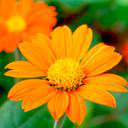

In [105]:
from PIL import Image
Image.open('/home/mana/Pictures/flower-thump.jpg')

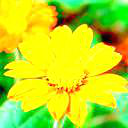

In [106]:
from PIL import Image
Image.open('/home/mana/Pictures/flower-thump1.jpg')

In [113]:
from PIL import Image, ImageChops

a = Image.open('/home/mana/Pictures/flower-thump.jpg')
b = Image.open('/home/mana/Pictures/flower-thump1.jpg')
h1 = a.histogram()
h2 = b.histogram()
if h1 != h2:
    print('Both are not same images.') 
else:
    print('Both are same images.')

Both are not same images.


In [121]:
from PIL import Image, ImageChops

a = Image.open('/home/mana/Pictures/falls1.jpg')
b = Image.open('/home/mana/Pictures/falls2.jpg')
h1 = a.histogram()
h2 = b.histogram()
if h1 != h2:
    print('Both are not same images.') 
else:
    print('Both are same images.')

Both are not same images.


In [132]:
from PIL import Image, ImageChops

a = Image.open('/home/mana/Pictures/sat1.jpg')
b = Image.open('/home/mana/Pictures/sat2.jpg')
h1 = a.histogram()
h2 = b.histogram()
if h1 != h2:
    ## If iamge not same. save a file
    b.save('/home/mana/Pictures/change.jpg') 
else:
    print('Both are same images.')

In [ ]:
from PIL import Image, ImageChops

a = Image.open('/home/mana/Pictures/flower-thump.jpg')
b = Image.open('/home/mana/Pictures/flower-thump1.jpg')
c = ImageChops.difference(a, b)
c.histogram()

### rms

In [8]:
# Original function

from PIL import ImageChops
import math, operator

# The 2011 version using more recent Python idioms

def rmsdiff_2011(im1, im2):
    "Calculate the root-mean-square difference between two images"
    diff = ImageChops.difference(im1, im2)
    h = diff.histogram()
    sq = (value*(idx**2) for idx, value in enumerate(h))
    sum_of_squares = sum(sq)
    rms = math.sqrt(sum_of_squares/float(im1.size[0] * im1.size[1]))
    return rms
im1 = Image.open('/home/mana/Pictures/flower-thump.jpg')
im2 = Image.open('/home/mana/Pictures/flower-thump1.jpg')
rmsdiff_2011(im1, im2)

635.4129281289439

### difference ratio

In [14]:
from PIL import Image,ImageChops,ImageStat

im1 = Image.open('/home/mana/Pictures/sat1.jpg')
im2 = Image.open('/home/mana/Pictures/sat2.jpg')
diff_img = ImageChops.difference(im1,im2)
diff_img.convert('RGB').save('/home/mana/Pictures/diff_img_file.jpg')
stat = ImageStat.Stat(diff_img)
# can be [r,g,b] or [r,g,b,a]
sum_channel_values = sum(stat.mean)
max_all_channels = len(stat.mean) * 100
diff_ratio = sum_channel_values/max_all_channels
diff_ratio

0.2111066573719066